# Лабораторные по Методам оптимизации

In [1]:
# используемые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
import time

## Лабораторная работа $№1$

Задание:     
+ Для функции $f(x) = x+2\sqrt{x}$ найти интервалы монотонности и точки экстремума       
+ Для функции $f(x) = x^4+2x^2+4x+1$ найти точку минимума $x_*$ и значение функции $f_*$ в этой точке, в интервале $[-1,0]$ с точностью $\epsilon=0.002$

In [180]:
def plot(x1,x2, func,l):
    xSpace = np.linspace(x1,x2,500)
    plt.xlabel(r'$X$')
    plt.ylabel(r'$f(X)$')
    plt.axvline(0, color='black', linewidth='0.8')
    plt.axhline(0, color='black', linewidth='0.8')
    plt.grid(True, linestyle='--',linewidth='0.5')
    plt.plot(xSpace, func(xSpace), label=l)
    plt.legend()

In [181]:
def derivative(func, x, h=0.00001):
    return (func(x + h) - func(x - h)) / (2 * h)

In [182]:
def dichotomyMethod(x1,x2,func,delta):
    mode = 1 if derivative(func,(x1+x2)/2) > 0 else -1
    deltaM= 2*delta #deltaMultiply типа 2 же умножается на дельту
    deltaD = delta*0.5 #deltaDivine тип дельта же делится на 2 по сути
    while np.abs(x2-x1) > deltaM:
        b = (x2+x1)/2 + deltaD
        a = (x2+x1)/2 - deltaD
        if mode * func(a) < mode * func(b):
            x2 = b
        else: 
            x1 = a 
    return (x1+x2)/2
""" Поиск экстремума функции Методом половинного деления (дихотомии,бисекции) 
mode=1 находит минимум на интервале, mode=-1 максимум """

' Поиск экстремума функции Методом половинного деления (дихотомии,бисекции) \nmode=1 находит минимум на интервале, mode=-1 максимум '

In [183]:
def bisecktionMethod(x1,x2,func,delta):
    delta = 2*delta
    while np.abs(x2-x1) > delta:
        x0 = (x2+x1)/2
        if x0 == 0:
            return x0 
        if func(x0)*func(x2) < 0: 
            x1 = x0 
        else:
            x2 = x0 
    return (x2+x1)/2
""" Метод половинного деления только для поиска корня """
# это в задание не входило, так чисто для себя

' Метод половинного деления только для поиска корня '

In [184]:
def analize(func):
    # нахождение производной
    x = sp.symbols('x')
    f = func(x)
    df = sp.diff(f, x)
    print(f"Производная {df} Функции {f}")
    equation = sp.Eq(df, 0)
    solution = sp.solve(equation, x)
    solution = [point.evalf() for point in solution if point.is_real]
    # solution содержит все экстремумы 
    intervals = sorted(solution + [-sp.oo,sp.oo]) if len(solution) != 0 else [0, sp.oo]
    print(f"Ось: {intervals}")
    mono_intervals = []
    
    for i in range(len(intervals)-1):
        midpoint = (intervals[i] + intervals[i + 1]) / 2
        derivative_value = (df.subs(x, midpoint)).evalf()
        interval = [intervals[i], intervals[i + 1]]

        if derivative_value > 0:
            mono_intervals.append((interval, "Возрастает"))
        elif derivative_value < 0:
            mono_intervals.append((interval, "Убывает"))
        else:
            mono_intervals.append((interval, "Плоско как на равнине"))

    
    print(f"Интервалы монотонности: {mono_intervals}")


    


Производная 1 + 1/sqrt(x) Функции 2*sqrt(x) + x
Ось: [0, oo]
Интервалы монотонности: [([0, oo], 'Возрастает')]
Экстремум функции в 0.0019746093750000002 со значением 0.09084776336426721
Производная 4*x**3 + 4*x + 4 Функции x**4 + 2*x**2 + 4*x + 1
Ось: [-oo, -0.682327803828019, oo]
Интервалы монотонности: [([-oo, -0.682327803828019], 'Убывает'), ([-0.682327803828019, oo], 'Возрастает')]
Экстремум функции в -0.682251953125 со значением -0.5814121520303155


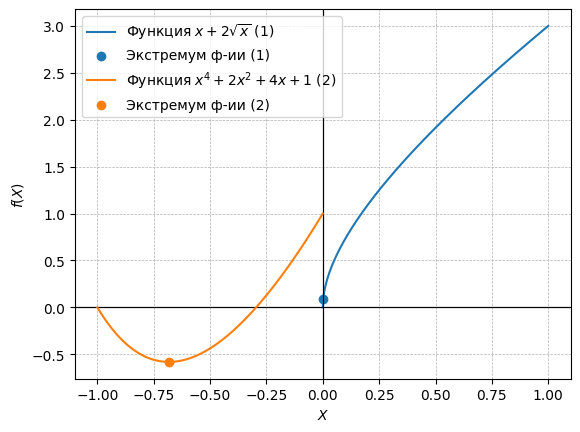

In [185]:
x = sp.symbols('x')
f1_sp = lambda x: x + 2 * sp.sqrt(x)
f1_np = lambda x: x + 2 * np.sqrt(x)
f2 = lambda x: x**4 + 2*x**2 + 4*x + 1
a1, b1 = 0, 1
a2, b2 = -1, 0
epsilon = 0.002

analize(f1_sp)
plot(a1,b1,f1_np,l=r"Функция $x + 2\sqrt{x}$ (1)")
x = dichotomyMethod(a1,b1,f1_np,epsilon)
plt.scatter(x,f1_np(x), label="Экстремум ф-ии (1)")
print(f"Экстремум функции в {x} со значением {f1_np(x)}")

analize(f2)
plot(a2,b2,f2,l=r"Функция $x^4+2x^2+4x+1$ (2)")
x = dichotomyMethod(a2,b2,f2,epsilon)
plt.scatter(x,f2(x), label="Экстремум ф-ии (2)")
print(f"Экстремум функции в {x} со значением {f2(x)}")
plt.legend()

## Лабораторная работа $№2$

Задание:        
Методом Перебора и Методом Ньютона найти точку минимума $(x^*,y^*)$ функции $f(x,y)$ на множестве $(*)$ с точностью $(**)$, начальное приближение для Метода Ньютона по условию подбирается самостоятельно          
$f(x,y) = x + 5y + e^{x^2 + y^2}$         
$[x',x''] \times [y',y''] = [-2,2] \times [-2,2]$           $(*)$      
$\epsilon = 0.01$              $(**)$       

In [190]:
def plot3D(func, ax, x,y):
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    x = np.linspace(x[0],x[1])
    y = np.linspace(y[0],y[1])
    x, y = np.meshgrid(x,y)
    z = func(x,y)
    ax.plot_surface(x,y,z)
    # ax.view_init(5,140)
    

In [191]:
def methodofbruteforce(func,x,y,h):
    start = time.time()
    # Пределы по осям
    ax, bx = x[0], x[1] 
    ay, by = y[0], y[1] 
    # Количество разбиений по осям
    nx = int((bx-ax)/h) 
    ny = int((by-ay)/h) 
    # print(nx,ny)
    # Поиск минимального значения
    xx,yy = 0,0 
    min = float('inf')

    for i in range(nx):
        x_v = ax+i*((bx-ax)/nx)
        for j in range(ny):
            y_v = ay+j*((by-ay)/ny)
            if func(x_v,y_v) < min:
                min = func(x_v,y_v)
                xx,yy = x_v,y_v
    end = time.time() - start
    print(f"Время работы Метода Перебора -- {end}")
    return min, xx, yy
""" 
Метод перебора для функции двух переменных
x и y - кортежи, списки 
h - точность 
"""

' \nМетод перебора для функции двух переменных\nx и y - кортежи, списки \nh - точность \n'

In [192]:
def newtonMethod(f,grad,hess,epsilon,xy_0):
    start = time.time()
    xx,yy = xy_0 # начальное приближение
    g = grad(xx,yy) 
    for _ in range(100):
        H = hess(xx,yy)
        H_1 = np.linalg.inv(H) 
        xx,yy = [xx,yy] - H_1 @ g # следующее приближение
        g = grad(xx,yy)
        if all(abs(i) < epsilon for i in g):
            break 
    end = time.time() - start
    print(f"Время работы Метода Ньютона -- {end}")
    return xx, yy, f(xx,yy)

""" 
Метод Ньютона для функции двух переменных
xy_0 - начальное приближение
grad - градиент
hess - Гессиана
"""

' \nМетод Ньютона для функции двух переменных\nxy_0 - начальное приближение\ngrad - градиент\nhess - Гессиана\n'

Метод Перебора: 

Время работы Метода Перебора -- 0.23499083518981934
 Точка минимума: (-0.18999999999999995, -0.96) 
 Значение минимума: -2.384303525821625 
 
Метод Ньютона: 

Время работы Метода Ньютона -- 0.0
 Точка минимума: (np.float64(-0.19030776545790762), np.float64(-0.9599883233467864)) 
 Значение минимума: -2.3843063282644543 
 


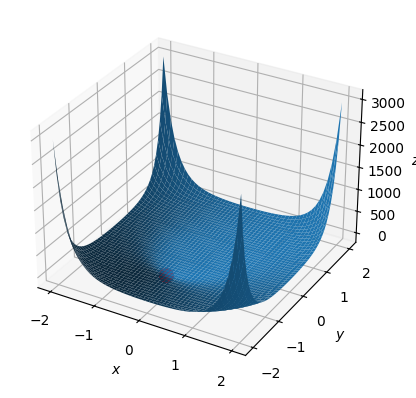

In [193]:
fig = plt.figure()
ax = plt.axes(projection='3d')

def f_xy(x,y):
    return (x + 5*y + np.exp(x**2+y**2))
def grad_f(x,y):
    dfdx = 1 + 2*x * np.exp(x**2+y**2)
    dfdy = 5 + 2*y * np.exp(x**2+y**2)
    return np.array([dfdx, dfdy])
def hessian_f(x,y):
    ddfdx = (2 + 4*x**2) * np.exp(x**2+y**2)
    ddfdy = (2 + 4*y**2) * np.exp(x**2+y**2)
    ddfdxdy = 2*y*x*np.exp(x**2+y**2)
    return np.array([[ddfdx, ddfdxdy],[ddfdxdy,ddfdy]])
    

x = (-2., 2.)
y = (-2., 2.)
epsilon = 0.01
xy = (0.5,0.5)
plot3D(f_xy,ax,x,y)

# Метод Перебора

print("Метод Перебора: \n")

f,xx,yy = methodofbruteforce(f_xy,x,y,epsilon)
ax.scatter3D(xx,yy,f, s=100, color='red')

print(f" Точка минимума: {(xx,yy)} \n Значение минимума: {f} \n ")

# Метод Ньютона

print("Метод Ньютона: \n")

xx, yy, f = newtonMethod(f_xy,grad_f,hessian_f,epsilon,xy)
ax.scatter3D(xx,yy,f, s=50, color='black')

print(f" Точка минимума: {(xx,yy)} \n Значение минимума: {f} \n ")


## Лабораторная работа $№3$